##1. Loading Packages and Data

In [0]:
# pandas for data loading, manipulation etc.
import pandas as pd

# numeric functions
import numpy as np
from scipy import stats
from math import ceil

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# modelling
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
url = 'https://github.com/Nan260/MGMT-6560-Project/raw/master/train.csv'
train = pd.read_csv(url)

In [359]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [360]:
url = 'https://github.com/Nan260/MGMT-6560-Project/raw/master/test.csv'
test= pd.read_csv(url)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Datasets Describe

In [361]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [362]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [363]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##3. Basic Data Analysis

In [0]:
# Drop "Id" column
trainID = train['Id'] #backup train dataset with the id column
testID = test['Id']   #backup test dataset with the id column
train.drop('Id', axis = 1, inplace = True) 
test.drop('Id', axis = 1, inplace = True)

###3.1 dependent Variable Analytics

####3.1.1 SalePrice Distribution

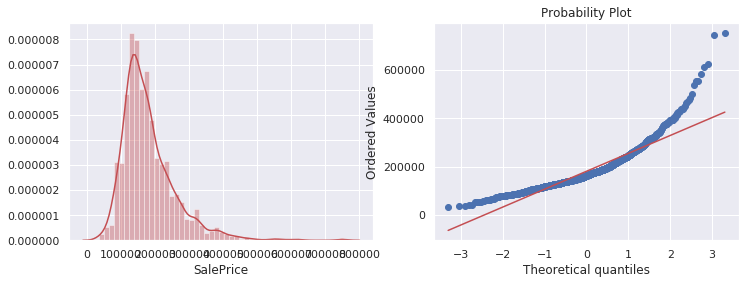

In [366]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice, color = 'r')
plt.subplot(1,2,2)
_=stats.probplot(train.SalePrice.dropna(), plot=plt)

In [367]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [368]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

####3.1.2 SalePrice with numerical variables

In [369]:
#All of the numerical variables in train set
train_num=train.select_dtypes(exclude='object')
train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


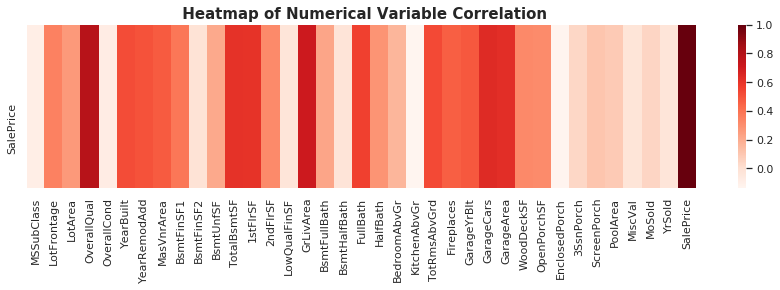

In [370]:
#Correlation between numerical varibale and SalePrice
numcorr=train_num.corr()
f,ax=plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Reds')
plt.title(" Heatmap of Numerical Variable Correlation", weight='bold', fontsize=15)
plt.show()

In [371]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(80).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


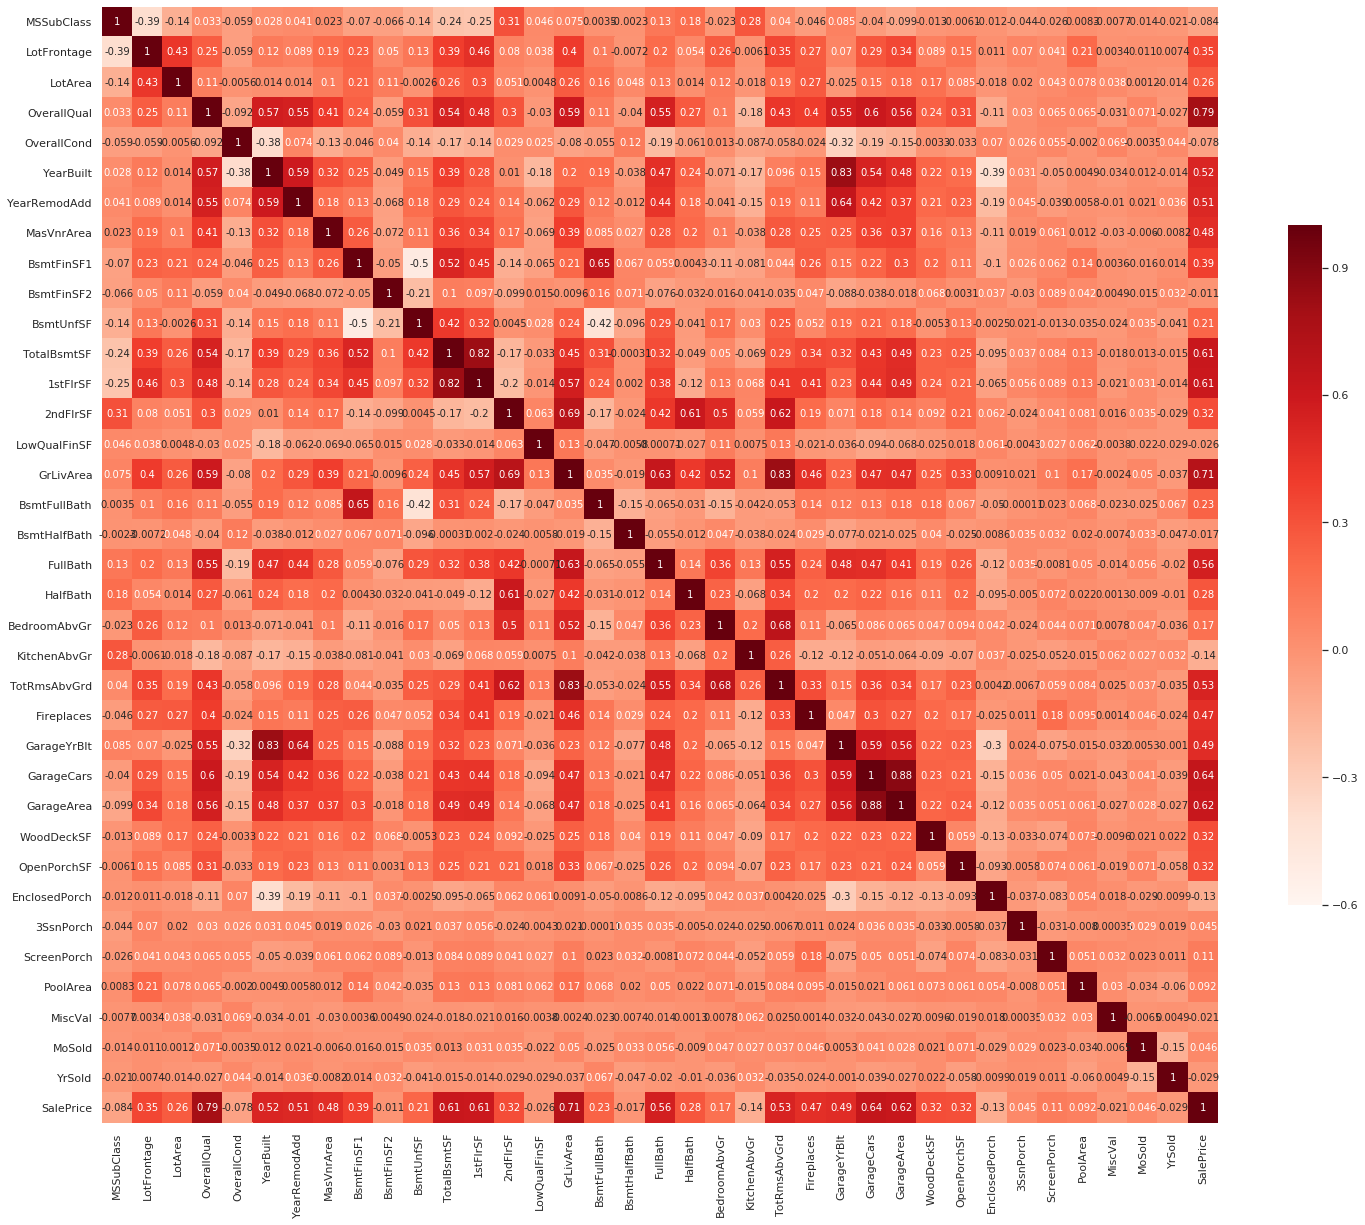

In [372]:
#correlation matrix
corr = train.corr()
plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="Reds", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [373]:
n_largest_top = 31
n_smallest_top = 15
top_large_corr = train.nlargest(n_largest_top, 'SalePrice')['SalePrice']
top_small_corr = train.nsmallest(n_smallest_top, 'SalePrice')['SalePrice']
print("Top Largest Corrolations :") 
print(top_large_corr)
print("____________________________")
print("Top Smallest Corrolations :") 
print(top_small_corr)
num_attrs = np.append(top_large_corr.index.values, top_small_corr.index.values, axis=0)

Top Largest Corrolations :
691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
1142    424870
664     423000
278     415298
161     412500
1353    410000
231     403000
515     402861
661     402000
987     395192
774     395000
1437    394617
Name: SalePrice, dtype: int64
____________________________
Top Smallest Corrolations :
495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
1380    58500
410     60000
636     60000
1100    60000
375     61000
Name: SalePrice, dtype: int64


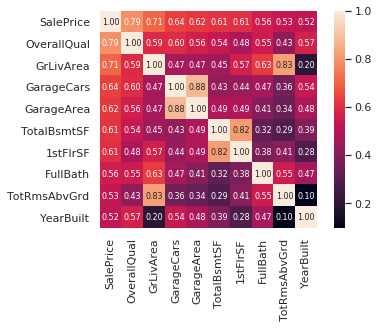

In [374]:
correlation = train.corr()
k = 10 
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

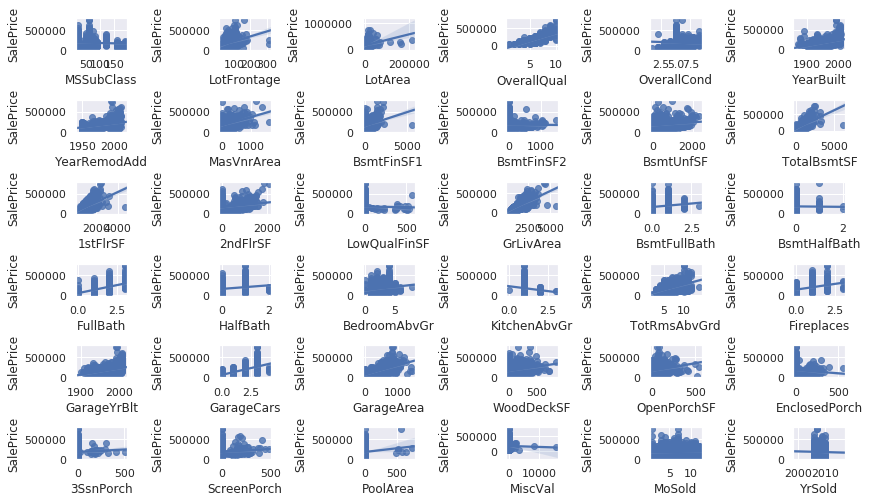

In [375]:
# Visualization of Numeriacal Varibales and SalePrice
fig0 = plt.figure(figsize=(12, 7))
for i in np.arange(36):
    ax = fig0.add_subplot(6, 6, i+1)
    sns.regplot(x=train_num.iloc[:, i], y=train['SalePrice'])
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


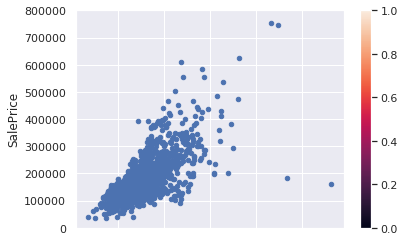

In [376]:
#relation plot between grlivarea and saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),cmap='Accent');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


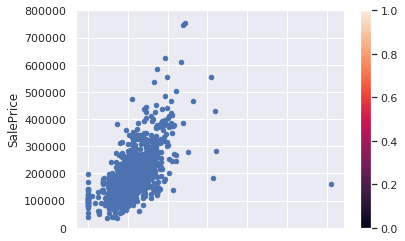

In [377]:
#relation plot between totalbsmtsf & saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),cmap='Accent');

####3.1.3 SalePrice with categorical variables

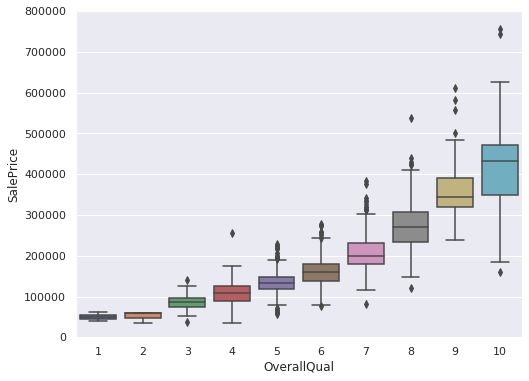

In [378]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

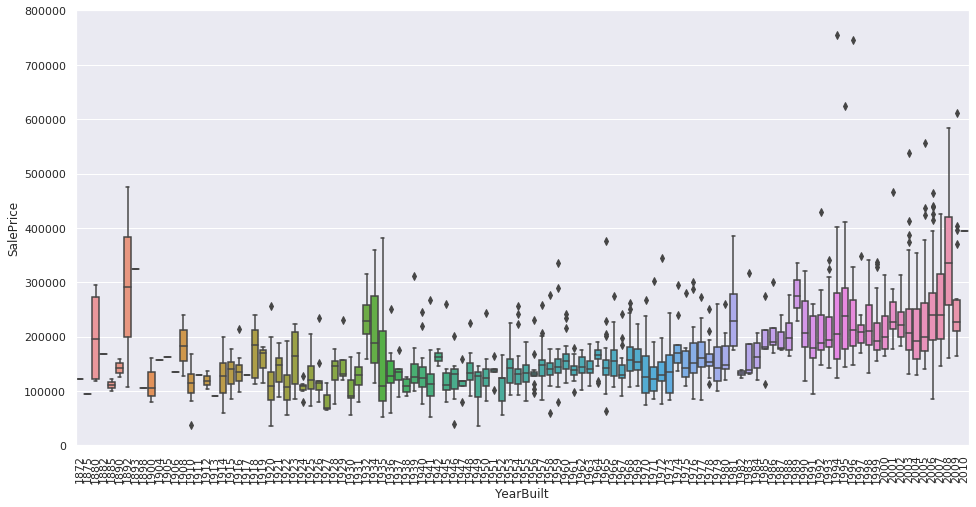

In [379]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

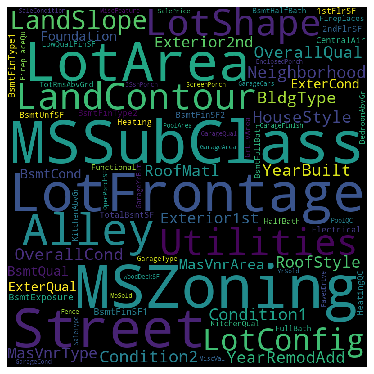

In [380]:
#word cloud map of the string features
names = ' '
for name in train:
    name = str(name)
    names = names + name + ' '
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = 'w') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##4. Data Cleaning


###4.1 Merge the train and test dataset

In [381]:
train_sale = train.SalePrice # "train_sale" is the dataset of SalePrice
total = pd.concat((train, test)).reset_index(drop=True) 
total.drop(['SalePrice'], axis=1, inplace=True) # "total" is the dataset merged train and test without saleprice.
print(total.shape)
total.head()

(2919, 79)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [382]:
print(train_sale.head(5))

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


###4.2 Missing Data

In [383]:
total_na = (total.isnull().sum() / len(total)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :total_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


In [384]:
# missing data overview
total_miss = total.isnull().sum().sort_values(ascending=False)
total_miss_percent =(total.isnull().sum()/total.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_miss, total_miss_percent], axis=1, keys=['Total Miss', 'Percentage'])
missing_data.head(50)  #"missing_data" is the set of number of total missing data

,Total Miss,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


In [385]:
#Drop the missing data with percentage over 50%.
total2 = total.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1)
print(total2.shape)
total2


(2919, 74)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [386]:
total_miss2 = total2.isnull().sum().sort_values(ascending=False)
total_miss_percent2 = (total2.isnull().sum()/total2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total_miss2, total_miss_percent2], axis=1, keys=['Total Miss2', 'Percentage2'])
missing_data2.head(20)  #"missing_data" is the set of number of total missing data

,Total Miss2,Percentage2
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749
BsmtFinType2,80,0.027407


In [387]:
# Fill in NaN with None. In these string feature, NaN has meaning, means the house doesn't have that part. 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
            ,'MasVnrType', 'MSSubClass'):
    total2[col] = total2[col].fillna('None') 

total2


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,0.0,0.0,None,None,None,None,NaN,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,0,PConc,1,Typ,0.0,0.0,None,None,None,None,NaN,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [388]:
# Fill in missing with mode. 
for col in ('MSZoning', 'Electrical', 'Functional', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities'):
    total2[col] = total2[col].fillna(total2[col].mode()[0])
total2

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,0.0,0.0,None,None,None,None,NaN,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,0,PConc,1,Typ,0.0,0.0,None,None,None,None,NaN,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [389]:
from scipy import stats
 
stats.mode(total2['SaleType'])[0][0]

'WD'

In [390]:
# filling in the columns where 0 has meaning with 0.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    total2[col] = total2[col].fillna(0)
total2


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,0.0,0.0,None,None,None,None,0.0,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,0,PConc,1,Typ,0.0,0.0,None,None,None,None,0.0,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,700,7,Mitchel,32,5,5,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [391]:
#check if all the missing data is filled.
print(total2.isnull().sum().sort_values(ascending=False)) # LotFrontage still has the missing data

LotFrontage    486
YrSold           0
Electrical       0
ExterCond        0
ExterQual        0
              ... 
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
1stFlrSF         0
Length: 74, dtype: int64


In [0]:
# filling in missing data in LotFrontage with median of Neighborhood.
total2['LotFrontage'] = total2.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [393]:
#double check if all the missing data is filled.
print(total2.isnull().sum().sort_values(ascending=False)) 

YrSold         0
Electrical     0
ExterCond      0
ExterQual      0
Exterior1st    0
              ..
MSSubClass     0
MSZoning       0
MasVnrArea     0
MasVnrType     0
1stFlrSF       0
Length: 74, dtype: int64


In [394]:
#double check if all the missing data is filled.
total2.info

<bound method DataFrame.info of       1stFlrSF  2ndFlrSF  3SsnPorch  ...  YearBuilt YearRemodAdd YrSold
0          856       854          0  ...       2003         2003   2008
1         1262         0          0  ...       1976         1976   2007
2          920       866          0  ...       2001         2002   2008
3          961       756          0  ...       1915         1970   2006
4         1145      1053          0  ...       2000         2000   2008
...        ...       ...        ...  ...        ...          ...    ...
2914       546       546          0  ...       1970         1970   2006
2915       546       546          0  ...       1970         1970   2006
2916      1224         0          0  ...       1960         1996   2006
2917       970         0          0  ...       1992         1992   2006
2918       996      1004          0  ...       1993         1994   2006

[2919 rows x 74 columns]>

##5. Feature Engineering

###5.1 create new features

In [395]:
#creat new feature by combing some features
total2['Year_Blt&Remod']=(total2['YearBuilt'] + (0.9*total2['YearRemodAdd'])) #weighted the YearRemodeAdd with 0.9

total2['Total_SF']=(total2['TotalBsmtSF'] + total2['1stFlrSF'] + total2['2ndFlrSF'])

total2['Total_FinSF'] = (total2['BsmtFinSF1'] + total2['BsmtFinSF2'] +
                                 total2['1stFlrSF'] + total2['2ndFlrSF'])

total2['Total_Bathrooms'] = (total2['FullBath'] + (0.5 * total2['HalfBath']) +
                               total2['BsmtFullBath'] + (0.5 * total2['BsmtHalfBath']))

total2['Total_porch_sf'] = (total2['OpenPorchSF'] + total2['3SsnPorch'] +
                              total2['EnclosedPorch'] + total2['ScreenPorch'] +
                              total2['WoodDeckSF'])
total2


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Year_Blt&Remod,Total_SF,Total_FinSF,Total_Bathrooms,Total_porch_sf
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,3805.7,2566.0,2416.0,3.5,61
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,3754.4,2524.0,2240.0,2.5,298
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,3802.8,2706.0,2272.0,3.5,42
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,3688.0,2473.0,1933.0,2.0,307
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,3800.0,3343.0,2853.0,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,0.0,0.0,None,None,None,None,0.0,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,0,6,MeadowV,0,7,4,Y,0,CompShg,Gable,Normal,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006,3743.0,1638.0,1092.0,1.5,0
2915,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,0,4,MeadowV,24,5,4,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006,3743.0,1638.0,1344.0,1.5,24
2916,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,0,9,Mitchel,0,7,5,Y,0,CompShg,Gable,Abnorml,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006,3756.4,2448.0,2448.0,2.0,474
2917,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,

In [396]:
total2['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, Length: 2919, dtype: object

###5.2 Get dummies

In [397]:
# Get dummies to make more features. 
total3 = pd.get_dummies(total2).reset_index(drop=True)
total3.shape
total3

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Year_Blt&Remod,Total_SF,Total_FinSF,Total_Bathrooms,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,8,856.0,0,2003,2003,2008,3805.7,2566.0,2416.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,0,6,1262.0,298,1976,1976,2007,3754.4,2524.0,2240.0,2.5,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,6,920.0,0,2001,2002,2008,3802.8,2706.0,2272.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,0,7,756.0,0,1915,1970,2006,3688.0,2473.0,1933.0,2.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,9,1145.0,192,2000,2000,2008,3800.0,3343.0,2853.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,0,1,0.0,0.0,0.0,1092,1,1,1936,21.0,0,160,0.0,0,6,0,7,4,0,0,5,546.0,0,1970,1970,2006,3743.0,1638.0,1092.0,1.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2915,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,0,1,286.0,1.0,1970.0,1092,1,1,1894,21.0,0,160,0.0,0,4,24,5,4,0,0,6,546.0,0,1970,1970,2006,3743.0,1638.0,1344.0,1.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2916,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,1,1,576.0,2.0,1960.0,1224,0,1,20000,160.0,0,20,0.0,0,9,0,7,5,0,0,7,1224.0,474,1960,1996,2006,3756.4,2448.0,2448.0,2.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2917,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,0,1,0.0,0.0,0.0,970,0,1,10441,62.0,0,85,0.0,700,7,32,5,5,0,0,6,912.0,80,1992,1992,2006,3784.8,1882.0,1307.0,1.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [398]:
# Seperate train and test set
n = train.shape[0]
train_new = total3[:n]
test_new = total3[n:]
train_new.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Year_Blt&Remod,Total_SF,Total_FinSF,Total_Bathrooms,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,8,856.0,0,2003,2003,2008,3805.7,2566.0,2416.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,0,6,1262.0,298,1976,1976,2007,3754.4,2524.0,2240.0,2.5,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,6,920.0,0,2001,2002,2008,3802.8,2706.0,2272.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,0,7,756.0,0,1915,1970,2006,3688.0,2473.0,1933.0,2.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,9,1145.0,192,2000,2000,2008,3800.0,3343.0,2853.0,3.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [399]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [400]:
test_new.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Year_Blt&Remod,Total_SF,Total_FinSF,Total_Bathrooms,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1460,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,0,1,730.0,1.0,1961.0,896,0,1,11622,80.0,0,20,0.0,0,6,0,6,5,0,120,5,882.0,140,1961,1961,2010,3725.9,1778.0,1508.0,1.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1461,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,0,1,312.0,1.0,1958.0,1329,1,1,14267,81.0,0,20,108.0,12500,6,36,6,6,0,0,6,1329.0,393,1958,1958,2010,3720.2,2658.0,2252.0,1.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1462,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,1,2,482.0,2.0,1997.0,1629,1,1,13830,74.0,0,60,0.0,0,3,34,5,5,0,0,6,928.0,212,1997,1998,2010,3795.2,2557.0,2420.0,2.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1463,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,1,2,470.0,2.0,1998.0,1604,1,1,9978,78.0,0,60,20.0,0,6,36,6,6,0,0,7,926.0,360,1998,1998,2010,3796.2,2530.0,2206.0,2.5,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1464,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,0,2,506.0,2.0,1992.0,1280,0,1,5005,43.0,0,120,0.0,0,1,82,5,8,0,144,5,1280.0,0,1992,1992,2010,3784.8,2560.0,1543.0,2.0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


### 5.3 Skew Saleprice

In [401]:
train_sale.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [402]:
train_sale.shape

(1460,)

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


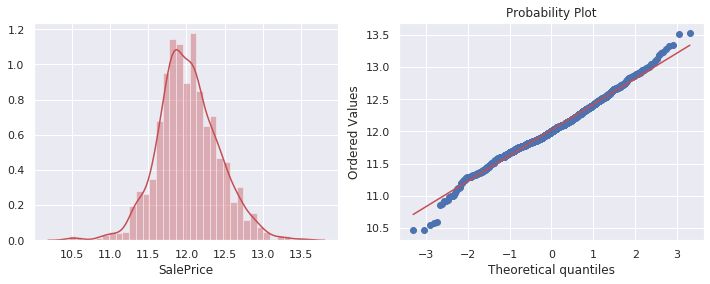

In [403]:
#Log Transform SalePrice to improve normality
train_sale2 = np.log(train_sale)
print(train_sale2.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(train_sale2, color = 'r')
plt.subplot(1,2,2)
_=stats.probplot(train_sale2.dropna(), plot=plt)

In [404]:
train_sale2

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

##6. Modeling

In [0]:
trainX, valX, trainY, valY = train_test_split(train_new.values, train_sale2, test_size=0.1, random_state=0)

###6.1 Naive Model




In [406]:
#Naive model-1 replace SalePrice with Mean

test_submission = pd.DataFrame()
test_submission["RealLabel"] = valY
test_submission["Pre_Label"] = trainY.mean()
naive_rmse= np.sqrt(mean_squared_error(test_submission["RealLabel"], test_submission["Pre_Label"]))
print("rmse score is {:.3f}".format(naive_rmse))

rmse score is 0.370


In [407]:
#Naive model-2replace SalePrice with Median
test_submission2 = pd.DataFrame()
test_submission2["RealLabel"] = valY
test_submission2["Pre_Label"] = trainY.median()
naive_rmse2= np.sqrt(mean_squared_error(test_submission2["RealLabel"], test_submission2["Pre_Label"]))
print("rmse2 score is {:.3f}".format(naive_rmse2))

rmse2 score is 0.371


###6.2 Lasso Model

In [408]:
#lasso model-1
alpha1 = 0.00099
lasso = Lasso(alpha=alpha1, max_iter=100000)
lasso.fit(trainX, trainY)
lasso_val = lasso.predict(valX)
lasso_rmse = np.sqrt(mean_squared_error(lasso_val, valY))
print("the lasso rmse is {:.3f}".format(lasso_rmse))

the lasso rmse is 0.114


In [409]:
#lasso model-2
alpha2 = 0.01
lasso2 = Lasso(alpha=alpha2, max_iter=100000)
lasso2.fit(trainX, trainY)
lasso_val2 = lasso2.predict(valX)
lasso_rsme2 = np.sqrt(mean_squared_error(lasso_val2, valY))
print("lasso rmse2 is {:.3f}".format(lasso_rsme2))

lasso rmse2 is 0.117


###6.3 Xgboost Model

In [410]:
#Xgboost model-1
Xgboost = xgb.XGBRegressor(colsample_bytree=0.2, learning_rate=0.06, max_depth=3, n_estimators=1150)
Xgboost.fit(trainX, trainY)
Xgboost_val = Xgboost.predict(valX)
Xgbosst_rmse = np.sqrt(mean_squared_error(Xgboost_val, valY ))
print("xgboost rmse is {:.3f}".format(Xgbosst_rmse))

[03:58:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


xgboost rmse is 0.110


In [411]:
#Xgboost model-2
Xgboost2 = xgb.XGBRegressor(colsample_bytree=0.2, learning_rate=0.06, max_depth=5, n_estimators=1150)
Xgboost2.fit(trainX, trainY)
Xgboost_val2 = Xgboost2.predict(valX)
Xgboost_rmse2 = np.sqrt(mean_squared_error(Xgboost_val2, valY ))
print("xgboost rmse2 is {:.3f}".format(Xgboost_rmse2))

[03:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


xgboost rmse2 is 0.112


###6.4 KRR Model

In [412]:
#kernel ridge model-1
KRR = KernelRidge(alpha=0.7, kernel='polynomial', degree=1, coef0=3)
KRR.fit(trainX, trainY)
KRR_val = KRR.predict(valX)
KRR_rmse = np.sqrt(mean_squared_error(KRR_val, valY))
print("the KRR rmse is {:.3f}".format(KRR_rmse))

the KRR rmse is 0.112


In [413]:
#kernel ridge model-2
KRR2 = KernelRidge(alpha=0.7, kernel='linear')
KRR2.fit(trainX, trainY)
KRR_val2 = KRR2.predict(valX)
KRR_rmse2 = np.sqrt(mean_squared_error(KRR_val2, valY))
print("the KRR2 rmse is {:.3f}".format(KRR_rmse2))

the KRR2 rmse is 0.132


###6.5 Ensemble Model

In [414]:
#Ensemble model
Ensemble = (lasso_val + Xgboost_val + KRR_val) / 3
ensemble_rmse = np.sqrt(mean_squared_error(Ensemble, valY))
print("the ensemble rmse is {:.3f}".format(ensemble_rmse))

the ensemble rmse is 0.107


###6.6 Model Performance Summary

In [415]:
results = pd.DataFrame({
    'Model': ['Naive','Xgboost','Lasso','Kernel Ridge','Ensemble'],
    'RMSE Score': [naive_rmse, Xgbosst_rmse,lasso_rmse, KRR_rmse, ensemble_rmse]
    })

result = results.sort_values(by='RMSE Score', ascending=True).reset_index()
result.head()

,index,Model,RMSE Score
0,4,Ensemble,0.107273
1,1,Xgboost,0.110374
2,3,Kernel Ridge,0.112449
3,2,Lasso,0.114071
4,0,Naive,0.370044


Text(0.5, 1.0, 'RMSE Score')

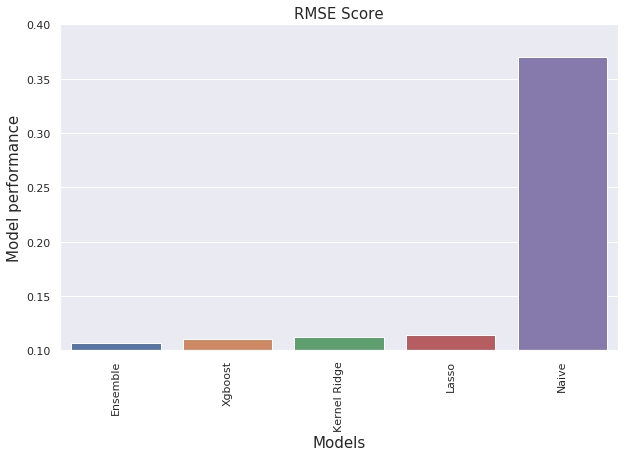

In [416]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result['Model'], y=result['RMSE Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model performance', fontsize=15)
plt.ylim(0.100, 0.40)
plt.title('RMSE Score', fontsize=15)

###6.7 Use to predict test_new 

In [417]:
pre_test_label_lasso = np.expm1(lasso.predict(test_new.values))
lasso_sub = pd.DataFrame()
lasso_sub["Id"] = testID
lasso_sub["SalePrice"] = pre_test_label_lasso
lasso_sub

,Id,SalePrice
0,1461,115151.446833
1,1462,139062.844457
2,1463,169765.212981
3,1464,198609.837503
4,1465,193797.920866
...,...,...
1454,2915,87021.693518
1455,2916,88576.074629
1456,2917,161989.628157
1457,2918,115923.678230
